In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [73]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.isna().all()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [11]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df.isnull().sort_values

<bound method DataFrame.sort_values of      Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0      False   False    False       False      False          False   
1      False   False    False       False      False          False   
2      False   False    False       False      False          False   
3      False   False    False       False      False          False   
4      False   False    False       False      False          False   
..       ...     ...      ...         ...        ...            ...   
609    False   False    False       False      False          False   
610    False   False    False       False      False          False   
611    False   False    False       False      False          False   
612    False   False    False       False      False          False   
613    False   False    False       False      False          False   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              False              F

<AxesSubplot:>

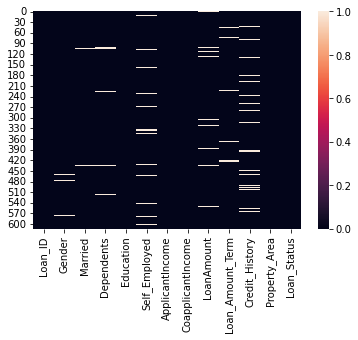

In [17]:
sns.heatmap(df.isnull())

In [43]:
#replacing missing values 
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace=True)

In [14]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

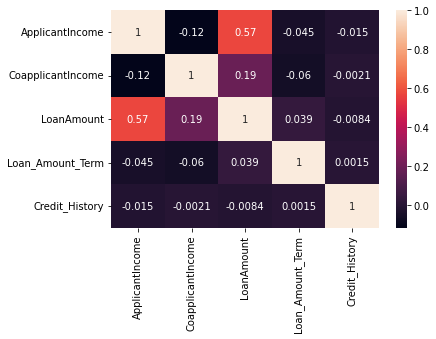

In [16]:
sns.heatmap(df.corr(), annot=True)

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

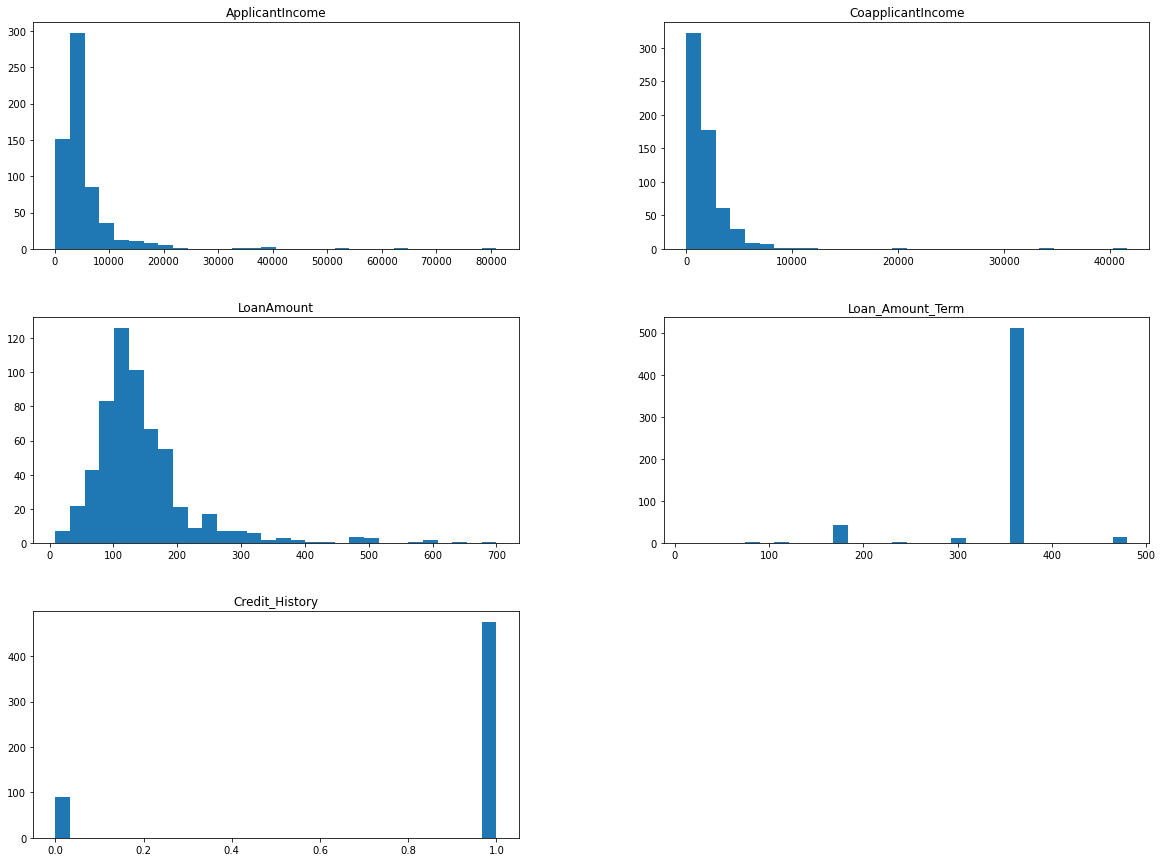

In [18]:
df.hist(grid=False,figsize=(20,15),bins=30)

array([[<AxesSubplot:xlabel='ApplicantIncome', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>],
       [<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>,
        <AxesSubplot:xlabel='CoapplicantIncome', ylabel='CoapplicantIncome'>,
        <AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='CoapplicantIncome'>,
        <AxesSubplot:xlabel='Credit_History', ylabel='CoapplicantIncome'>],
       [<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>,
        <AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>,
        <AxesSubplot:xlabel='LoanAmount', ylabel='LoanAmount'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', yl

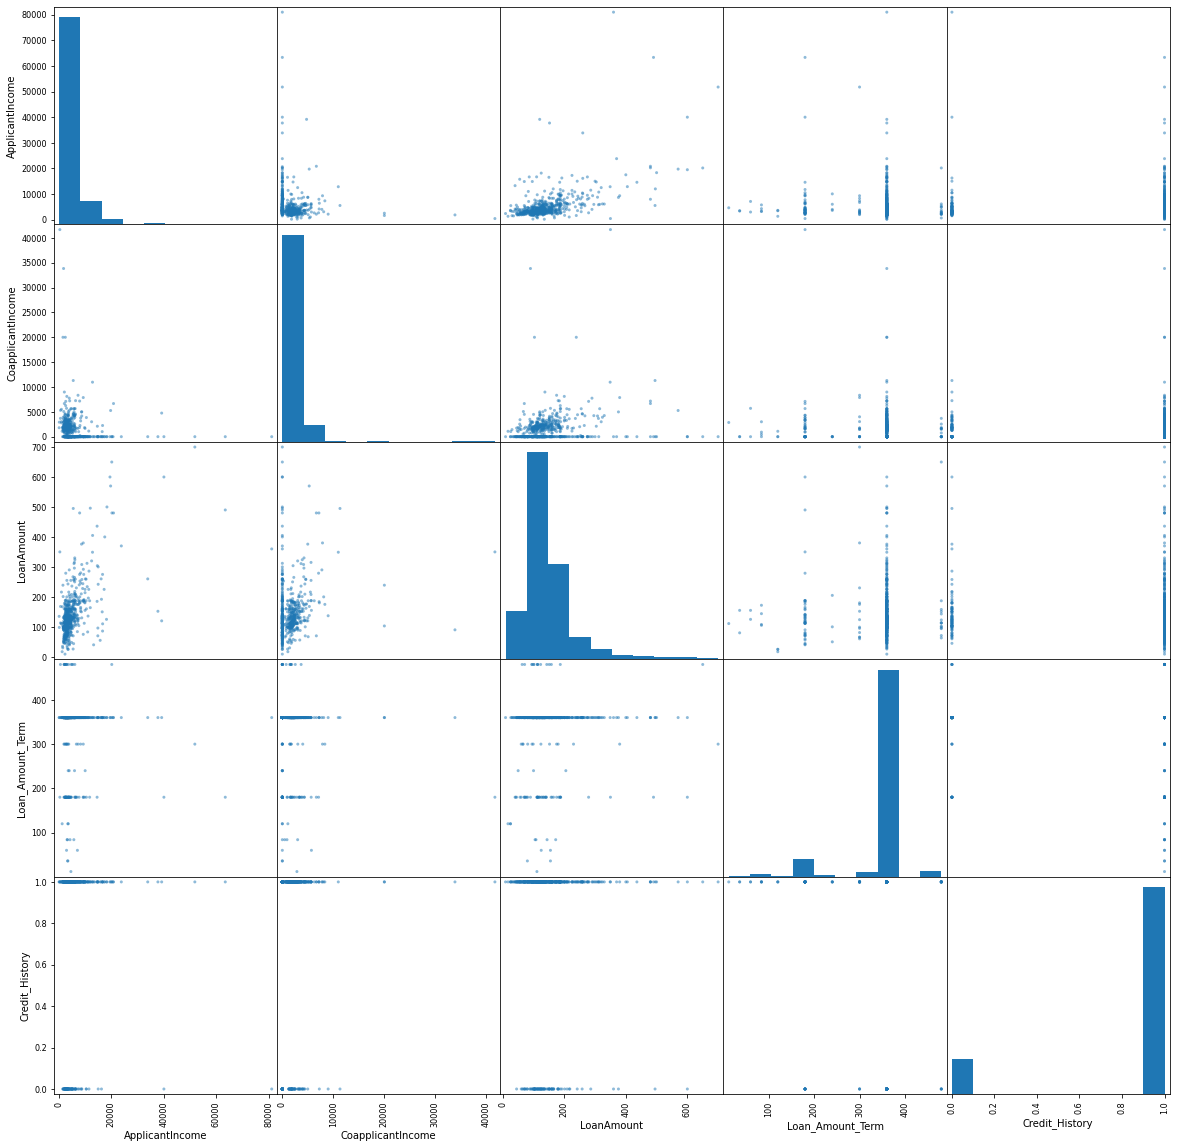

In [24]:
pd.plotting.scatter_matrix(df,figsize=(20,20))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

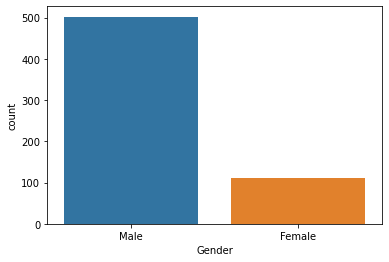

In [25]:
sns.countplot(df.Gender)

In [26]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Yes    401
No     213
Name: Married, dtype: int64

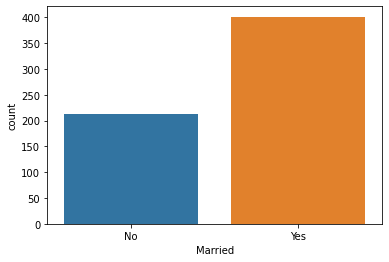

In [27]:
sns.countplot(df.Married)
df['Married'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

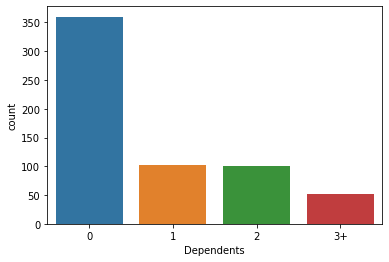

In [28]:
sns.countplot(df.Dependents)
df['Dependents'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

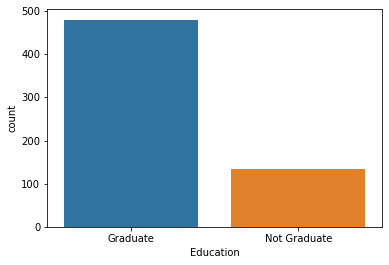

In [29]:
sns.countplot(df.Education)
df['Education'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


No     532
Yes     82
Name: Self_Employed, dtype: int64

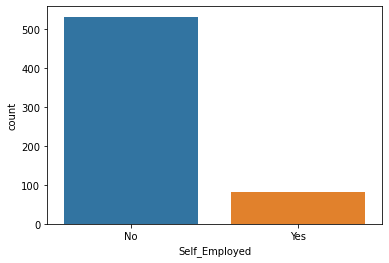

In [30]:
sns.countplot(df.Self_Employed)
df['Self_Employed'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

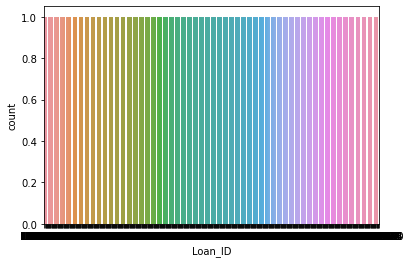

In [32]:
sns.countplot(df.Loan_ID)
df['Loan_ID'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Y    422
N    192
Name: Loan_Status, dtype: int64

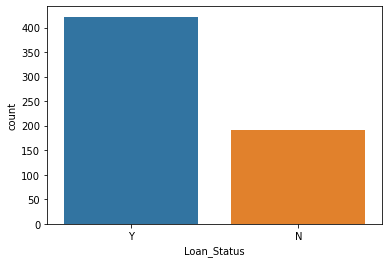

In [33]:
sns.countplot(df.Loan_Status)
df['Loan_Status'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

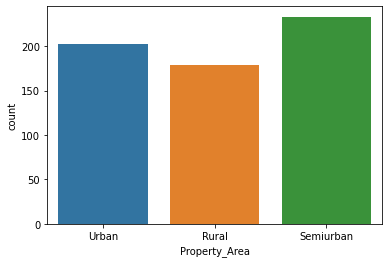

In [35]:
sns.countplot(df.Property_Area)
df['Property_Area'].value_counts()

<AxesSubplot:ylabel='Count'>

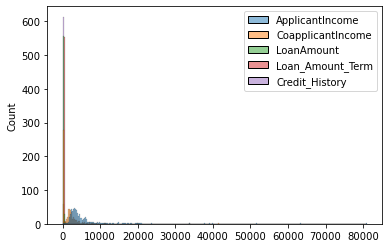

In [41]:
sns.histplot(data=df)

In [44]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

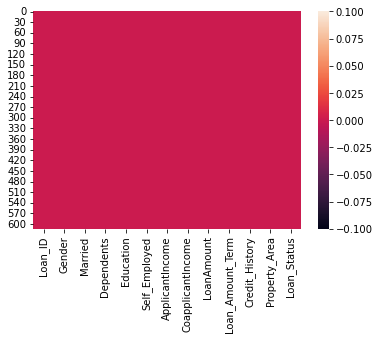

In [45]:
sns.heatmap(df.isnull())

We have succesfully eliminated all null values 

In [46]:
#checking fo skewness
df.skew()

C:\Users\HP\AppData\Local\Temp/ipykernel_32160/2559805109.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

to remove skewness, we'll use root square method 

In [74]:
df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])
df['LoanAmount']=np.sqrt(df['LoanAmount'])
df['CoapplicantIncome']=np.sqrt(df['CoapplicantIncome'])
df['Loan_Amount_Term']=np.sqrt(df['Loan_Amount_Term'])
df['Credit_History']=np.sqrt(df['Credit_History'])

In [75]:
df.skew()

C:\Users\HP\AppData\Local\Temp/ipykernel_32160/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


ApplicantIncome      2.967286
CoapplicantIncome    0.979561
LoanAmount           1.305382
Loan_Amount_Term    -3.135345
Credit_History      -1.882361
dtype: float64

As, we can see, we have reduced the skewness a great deal 

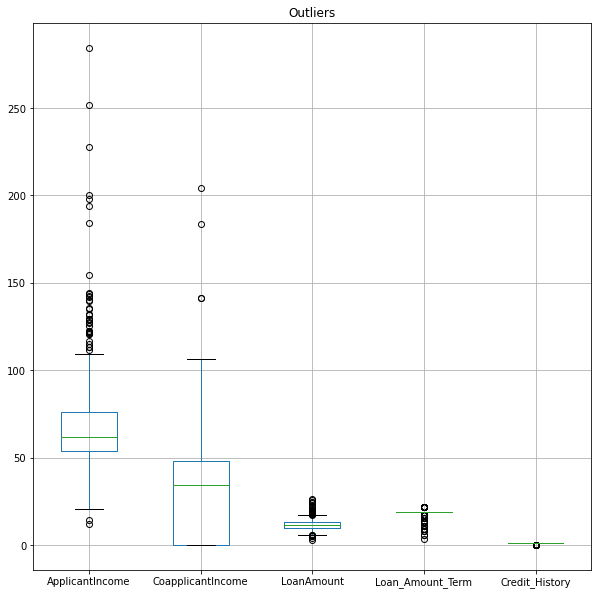

In [76]:
#checking for outliers 
df.iloc[:,0:30].boxplot(figsize=[10,20])
plt.subplots_adjust(bottom=0.5)
plt.title("Outliers")
plt.show()

In [77]:
#transforming the data 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Education']=le.fit_transform(df['Education'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Credit_History']=le.fit_transform(df['Credit_History'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Loan_Amount_Term']=le.fit_transform(df['Loan_Amount_Term'])
df['LoanAmount']=le.fit_transform(df['LoanAmount'])
df['Loan_ID']=le.fit_transform(df['Loan_ID'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['CoapplicantIncome']=le.fit_transform(df['CoapplicantIncome'])
df['Gender']=le.fit_transform(df['Gender'])
df['ApplicantIncome']=le.fit_transform(df['ApplicantIncome'])

In [78]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,203,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,125,0,29,8,1,0,1
610,610,1,1,3,0,0,275,0,7,5,1,0,1
611,611,1,1,1,0,0,431,3,162,8,1,2,1
612,612,1,1,2,0,0,422,0,132,8,1,2,1


In [79]:
#dividing the data 
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [84]:
#training the data 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression 

In [85]:
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is = {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is = {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is = 0.21002758984820113
At random state 0,the testing accuracy is = 0.15161163932859834


At random state 1,the training accuracy is = 0.20172635436752806
At random state 1,the testing accuracy is = 0.19502142287953772


At random state 2,the training accuracy is = 0.23270789025030458
At random state 2,the testing accuracy is = 0.065667794941633


At random state 3,the training accuracy is = 0.2008257044672498
At random state 3,the testing accuracy is = 0.1510964356320531


At random state 4,the training accuracy is = 0.23621374824931785
At random state 4,the testing accuracy is = 0.05536561133597606


At random state 5,the training accuracy is = 0.199228123211184
At random state 5,the testing accuracy is = 0.21074427461176504


At random state 6,the training accuracy is = 0.20339523090954748
At random state 6,the testing accuracy is = 0.18947584877466672


At random state 7,the training accuracy is = 0.19531741569444794
At random state 7,the te

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=49)

In [96]:
pred_test=lr.predict(x_test)

In [97]:
pred_train=lr.predict(x_train)

In [98]:
print(r2_score(y_test,pred_test)*100)

21.500522508009333


In [99]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [100]:
pred_test=lr.predict(x_test)
pred_test

array([0.79417279, 0.8358643 , 0.74175204, 0.69425173, 0.41973718,
       1.07122236, 0.69266975, 0.752343  , 0.76819328, 0.60664222,
       0.80123   , 0.74033717, 0.75838628, 0.74049569, 0.38180962,
       1.11916043, 0.77671834, 1.08576835, 0.71696917, 0.66634017,
       0.21585693, 0.73874583, 0.2589427 , 0.7294314 , 0.68987038,
       0.7613544 , 0.81301424, 0.7376145 , 0.77447109, 0.78816127,
       0.68038861, 0.79507516, 1.10136991, 0.73603192, 0.36079425,
       0.78438232, 0.83486593, 0.81052701, 0.78977079, 0.68021268,
       1.12322759, 0.31322906, 0.34446017, 0.55531832, 0.30711154,
       0.71378051, 0.64529469, 0.65710794, 0.88645219, 0.68968176,
       0.65501614, 0.70155816, 0.83629819, 0.75089686, 0.80154086,
       0.79098889, 0.55216607, 0.20198819, 0.74129515, 0.83371883,
       0.75096209, 0.3529177 , 0.74802063, 1.13364155, 0.74723468,
       0.74242714, 0.73015793, 0.62680671, 0.23925564, 0.66468176,
       0.60832624, 0.75676642, 0.6739533 , 0.7491366 , 0.54703

In [101]:
pred_train=lr.predict(x_train)
pred_train

array([0.51921982, 0.77275197, 0.2576615 , 0.82280559, 0.61367792,
       0.71981538, 0.61557827, 0.26831036, 0.91575345, 0.79192297,
       0.7292617 , 0.70393678, 0.93417719, 0.14059255, 1.1151501 ,
       0.77903409, 1.19285913, 0.61906789, 0.76140374, 0.33208114,
       0.78437266, 0.85063969, 0.27183776, 0.72737225, 0.69455034,
       0.75917297, 0.72445668, 0.71938167, 0.75021996, 0.7011822 ,
       0.71348534, 0.7823065 , 1.09211859, 0.6145413 , 1.21248106,
       0.27475954, 0.72301363, 0.67434869, 0.67196678, 0.86636897,
       0.31813831, 0.8006676 , 0.60584096, 0.27965459, 0.72402397,
       0.35500723, 0.72261806, 0.70937385, 0.68470812, 0.36625889,
       0.81115303, 0.80148262, 0.81610276, 0.82387223, 0.31702895,
       0.68288381, 0.71512467, 0.63474857, 0.66331677, 1.12827483,
       0.36336271, 0.75383999, 0.3322832 , 0.82628323, 0.67078257,
       0.29742498, 0.6693955 , 0.78392482, 0.66563711, 0.70119001,
       1.12455194, 0.80519205, 0.59828885, 0.41961355, 0.68701

In [102]:
lr_accuracy=round(lr.score(x_train,y_train)*100)
lr_accuracy

20

In [103]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=15, min_samples_leaf=2)
tree.fit(x_train,y_train)
tree_pred=tree.predict(x_test)
tree_pred

array([1.        , 1.        , 1.        , 1.        , 0.        ,
       0.5       , 1.        , 0.33333333, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 0.33333333,
       1.        , 1.        , 0.5       , 1.        , 1.        ,
       1.        , 0.        , 0.5       , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.5       , 1.        , 1.        ,
       0.5       , 0.        , 0.5       , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.33333333, 1.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.5       , 1.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.     

In [104]:
tree_accuracy=round(tree.score(x_train,y_train)*100)
tree_accuracy

87

In [105]:
from sklearn.ensemble import RandomForestRegressor 
rf=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=2,n_jobs=4)
rf.fit(x_train,y_train)
rf.pred=rf.predict(x_test)

In [106]:
rf_accuracy=round(rf.score(x_train,y_train)*100)
rf_accuracy

57

In [107]:
import xgboost
from xgboost import XGBRegressor

model=XGBRegressor(n_estimators=100,learning_rate=0.05)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [108]:
y_pred=model.predict(x_test)
y_pred

array([ 1.0272721 ,  0.8304549 ,  0.92144966,  0.961187  ,  0.03377735,
        0.40783197,  0.958569  ,  0.7757094 ,  0.9662229 ,  0.806404  ,
        0.8571619 ,  0.90169597,  0.79836786,  0.8571619 , -0.02408415,
        0.9082062 ,  0.9494048 ,  0.83976096,  0.713769  ,  0.76194996,
        0.20112549,  0.90580434,  0.6327569 ,  0.75434595,  0.8023626 ,
        0.9927524 ,  0.30829504,  0.7508029 ,  0.89496815,  0.9449137 ,
        0.80220515,  0.90758383,  0.7652106 ,  0.8083213 ,  0.05167622,
        0.88021624,  0.5865277 ,  0.67450607,  0.77825445,  0.92848206,
        0.7208766 , -0.01915607,  0.2731318 ,  0.5581541 ,  0.02434364,
        0.9825771 ,  0.53866696,  0.9201891 ,  0.753418  ,  0.921078  ,
        0.9489618 ,  0.871849  ,  0.74853426,  0.57616353,  0.8495151 ,
        0.74949515,  0.22565301,  0.14539224,  0.43726814,  0.77094346,
        0.93277764,  0.16073133,  0.72330374,  0.42528665,  0.7449066 ,
        0.49583882,  0.8347478 ,  0.908847  ,  0.06912094,  0.86

In [109]:
model.score(x_train,y_train)*100

85.84718298961602

In [110]:
model_accuracy=round(model.score(x_train,y_train)*100)
model_accuracy

86

In [111]:
#Cross validation  for desisiontree
scr=cross_val_score(tree,x,y,cv=5)
scr.mean()
print("Cross validation score of DecisionTreeRegression:",scr.mean())

Cross validation score of DecisionTreeRegression: -0.2595837742120752


In [119]:
#Cross validation  for xgboost
scr=cross_val_score(model,x,y,cv=5)
scr.mean()
print("Cross validation score of Xgboost:",scr.mean())

Cross validation score of Xgboost: 0.21122618111856556


So far, we have been able to complete an EDA for the above dataset. We can conlude that age, marital status and education play a very important role in the income a perosn earns. After completing that, I have trained the model such that we can get the best algorithm for prediction of incomes. The algorithm with the best accuracy is decision tee regressor and hence I will be saving the model with this algorithm.

In [120]:
#saving the model
import pickle 
filename='churn.pkl'
pickle.dump(tree,open(filename,'wb'))

In [122]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result=loaded_model.score(x_test,y_test)*-100
result

49.645562770562755

In [123]:
#creatig a new df
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_train[:]],index=["Predicted","Original"])

In [124]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,481,482,483,484,485,486,487,488,489,490
Predicted,1.00000,1.000000,1.000000,1.000000,0.000000,0.500000,1.000000,0.333333,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Original,0.51922,0.772752,0.257661,0.822806,0.613678,0.719815,0.615578,0.268310,0.915753,0.791923,...,0.671014,0.705639,0.775701,0.318718,0.245345,0.36101,0.803695,0.72714,0.824423,0.670137


In the end , we have made a model that will make accurate and close to perfect predictions for banks in real life instances 